In [1]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
from tqdm import tqdm
import seaborn
import matplotlib.pyplot as plt
from einops import rearrange

In [2]:
pares = []
for elm in tqdm(os.listdir('./saves')):
    data = torch.load(f'./saves/{elm}')
    
    pares.append((data['epoch'], data['loss']))

100%|██████████| 100/100 [00:38<00:00,  2.62it/s]


In [3]:
pares = np.array(pares)

In [4]:
epoch = pares[::,0]
loss = pares[::,1]

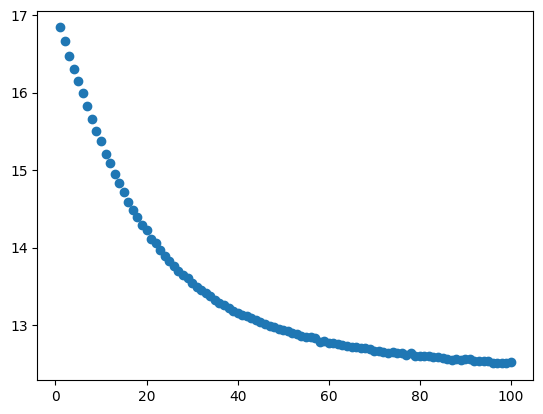

In [5]:
plt.scatter(epoch, loss)